In [1]:
import os
import os.path as op
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import skimage.io
import skimage.filters
from skimage.filters import try_all_threshold
import matplotlib.image as mpimg
from scipy import ndimage as ndi
from skimage.transform import resize
import skimage.morphology
import skimage.feature
import math
from math import sqrt
from skimage.color import rgb2gray
from skimage import measure
from skimage import data, util

(2, 512, 512)
uint16


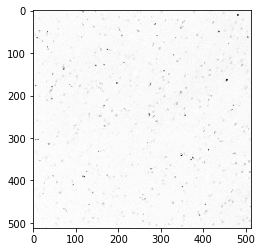

In [2]:
img = skimage.io.imread('NT_48h_PI_cortex_20x_images_XY3.tif')
print(img.shape)
print(img.dtype)
imgplot = plt.imshow(img[0,:,:], cmap='Greys')
plt.show()

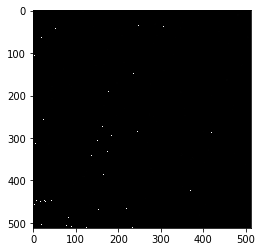

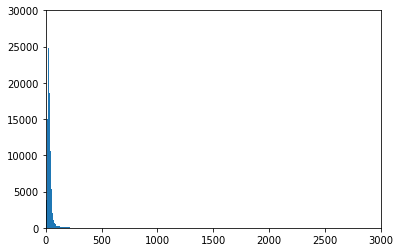

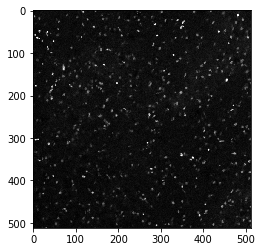

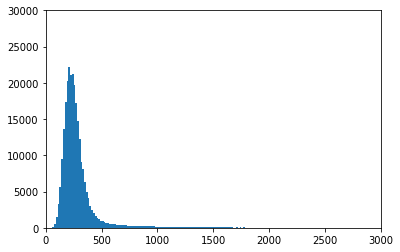

In [3]:
DAPI = img[0]
PI = img[1]

DAPIplot = plt.imshow(1-DAPI, cmap='Greys')
plt.show()
plt.hist(DAPI.ravel(), bins=256)
plt.ylim(0, 30000)
plt.xlim(0, 3000)
plt.show()
PIplot = plt.imshow(1-PI, cmap='Greys')
plt.show()
plt.hist(PI.ravel(), bins=256)
plt.ylim(0, 30000)
plt.xlim(0, 3000)
plt.show()

## DAPI channel processing

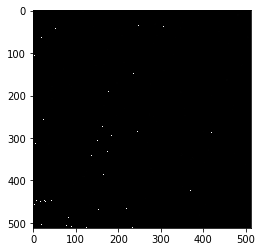

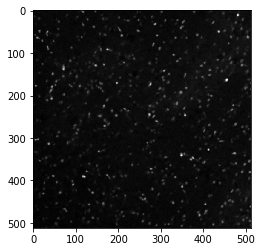

In [8]:
DAPI_filtered = ndi.gaussian_filter(DAPI, sigma=1)
DAPIplot = plt.imshow((1-DAPI), cmap='Greys')
plt.show()
filteredplot = plt.imshow(1-DAPI_filtered, cmap='Greys')
plt.show()

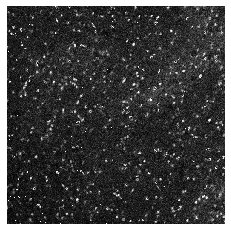

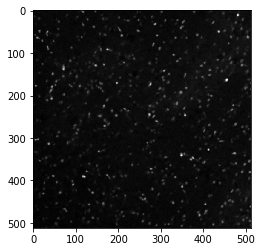

In [10]:
DAPI_filtered = ndi.gaussian_filter(DAPI, sigma=1)
DAPIplot = plt.imshow((1-DAPI)*300, cmap='Greys')
plt.axis('off')
plt.show()
filteredplot = plt.imshow(1-DAPI_filtered, cmap='Greys')
plt.show()

skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen


(<Figure size 1440x1296 with 8 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x1c1e429590>,
       dtype=object))

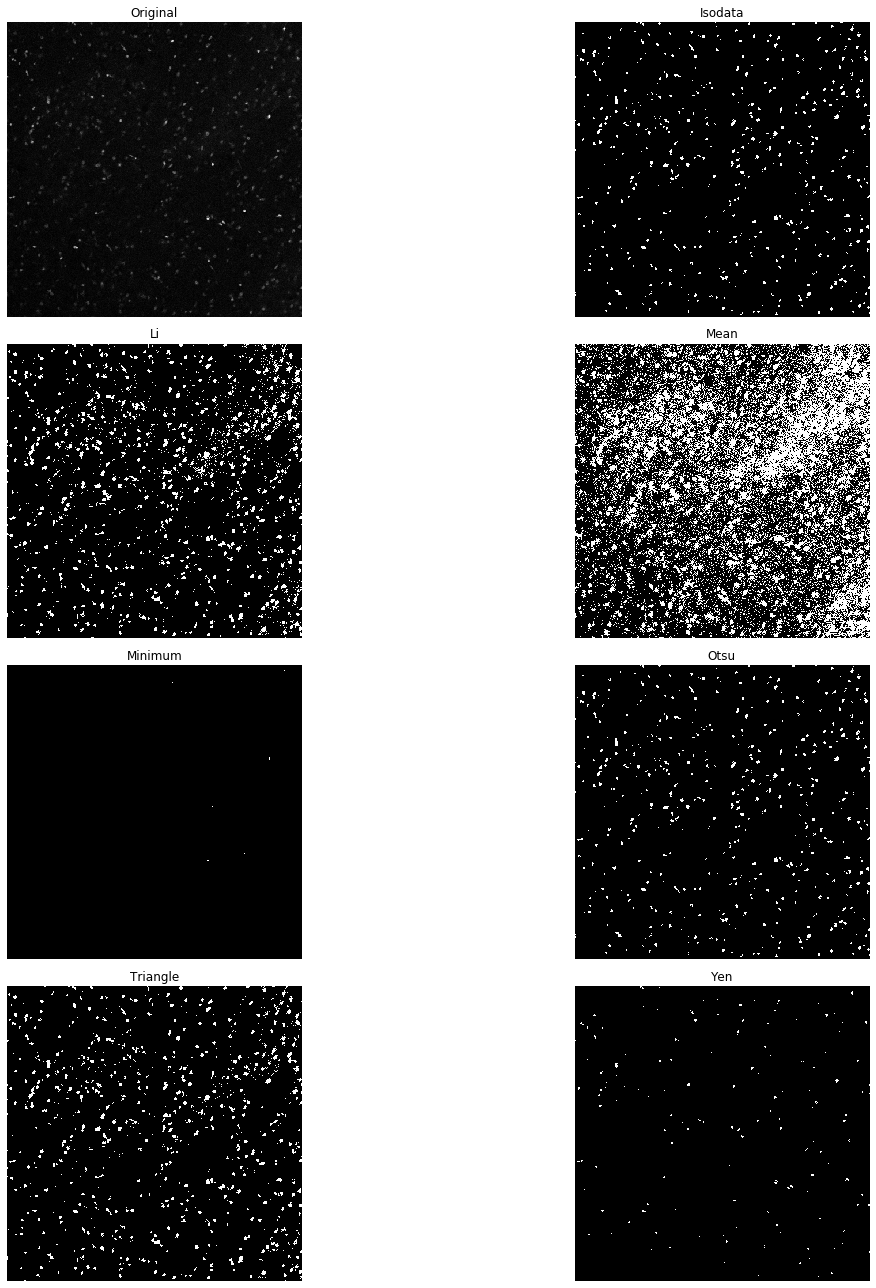

In [5]:
try_all_threshold(DAPI, figsize=(20,18))

skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen


(<Figure size 1440x1296 with 8 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x1c1af04350>,
       dtype=object))

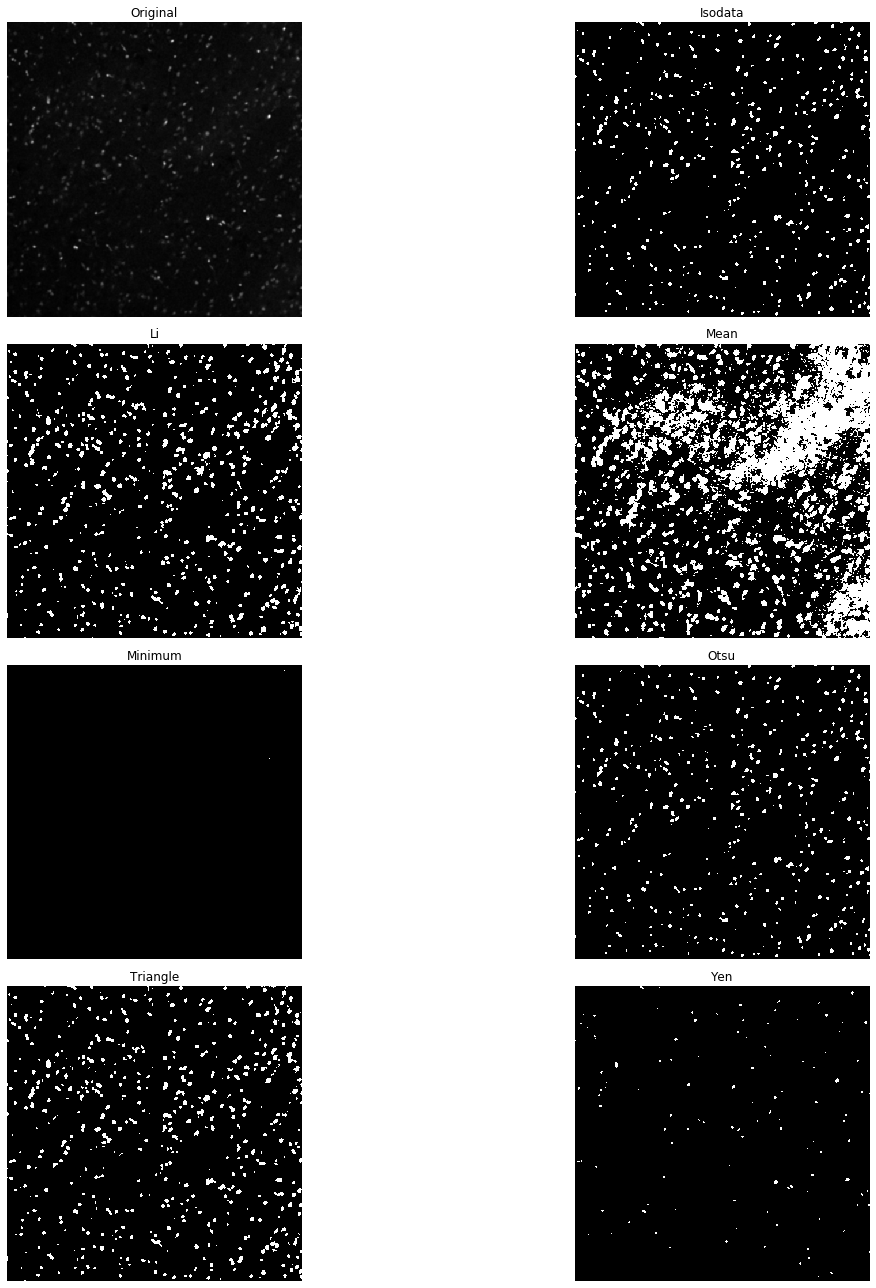

In [6]:
try_all_threshold(DAPI_filtered, figsize=(20,18))

## DAPI not using filtered

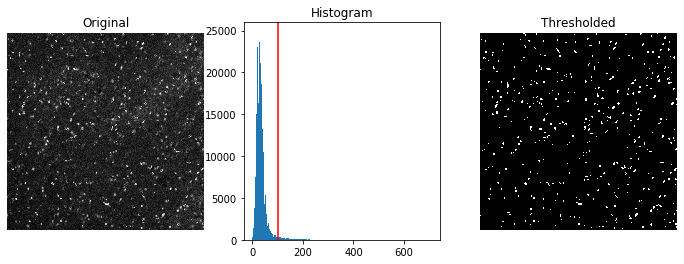

In [16]:
DAPI_thresh = skimage.filters.threshold_otsu(DAPI)
DAPI_binary = DAPI > DAPI_thresh

fig, axes = plt.subplots(ncols=3, figsize=(12, 4))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(DAPI*300, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(DAPI.ravel(), bins=256)
ax[1].set_title('Histogram')
ax[1].axvline(DAPI_thresh, color='r')

ax[2].imshow(DAPI_binary, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

plt.show()

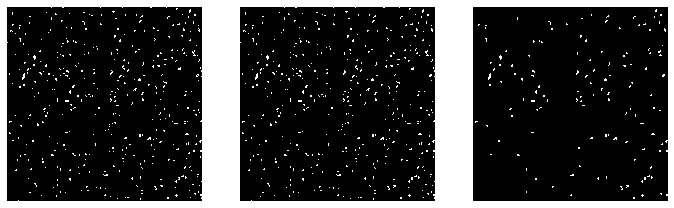

In [19]:
#DAPI_dilation = skimage.morphology.binary_dilation(DAPI_binary)
DAPI_filled_holes = ndi.binary_fill_holes(DAPI_binary)
DAPI_clean = skimage.morphology.remove_small_objects(DAPI_filled_holes, min_size=20)


fig, axes = plt.subplots(ncols=3, figsize=(16, 4))
ax = axes.ravel()
ax[0] = plt.subplot(1, 4, 1)
ax[1] = plt.subplot(1, 4, 2)
ax[2] = plt.subplot(1, 4, 3)
#ax[3] = plt.subplot(1, 4, 4)
ax[0].imshow(DAPI_binary, cmap=plt.cm.gray)
ax[0].axis('off')
#ax[1].imshow(DAPI_dilation, cmap=plt.cm.gray)
#ax[1].axis('off')
ax[1].imshow(DAPI_filled_holes, cmap=plt.cm.gray)
ax[1].axis('off')
ax[2].imshow(DAPI_clean, cmap=plt.cm.gray)
ax[2].axis('off')
plt.show()

In [16]:
log_blobs = skimage.feature.blob_log(DAPI_clean)
dog_blobs = skimage.feature.blob_dog(DAPI_clean)
doh_blobs = skimage.feature.blob_doh(DAPI_clean)

log_blobs[:, 2] = log_blobs[:, 2] * sqrt(1.5)
dog_blobs[:, 2] = dog_blobs[:, 2] * sqrt(1.5)
doh_blobs[:, 2] = doh_blobs[:, 2] * sqrt(1.5)

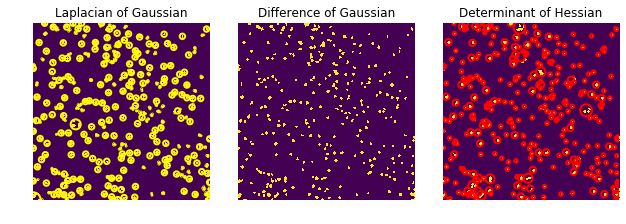

492 0 359


In [17]:
blobs_list = [log_blobs, dog_blobs, doh_blobs]
colors = ['yellow', 'lime', 'red']
titles = ['Laplacian of Gaussian', 'Difference of Gaussian',
          'Determinant of Hessian']
sequence = zip(blobs_list, colors, titles)

fig, axes = plt.subplots(1, 3, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()

for idx, (blobs, color, title) in enumerate(sequence):
    ax[idx].set_title(title)
    ax[idx].imshow(DAPI_clean)
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
        ax[idx].add_patch(c)
    ax[idx].set_axis_off()

plt.tight_layout()
plt.show()

print(len(log_blobs), len(dog_blobs), len(doh_blobs))

In [20]:
labeled_DAPI, _ = ndi.label(DAPI_clean)
DAPI_props = measure.regionprops(labeled_DAPI)

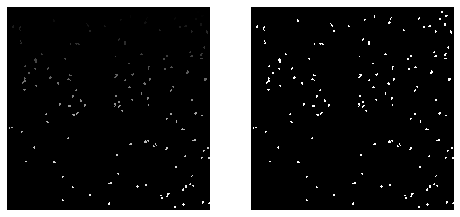

In [23]:
fig, axes = plt.subplots(ncols=2, figsize=(8, 4))
ax = axes.ravel()
ax[0] = plt.subplot(1, 2, 1)
ax[1] = plt.subplot(1, 2, 2)
ax[0].imshow(labeled_DAPI, cmap=plt.cm.gray)
ax[0].axis('off')
ax[1].imshow(DAPI_clean, cmap=plt.cm.gray)
ax[1].axis('off')
plt.show()

In [70]:
print(len(DAPI_props))
props_DAPI = pd.DataFrame(columns=['centroid x', 'centroid y', 'filled_area', 'area'])

k = 1
for props in DAPI_props:
    #Get the properties that I need for areas
    #Add them into a pandas dataframe that has the same number of rows as objects detected
    #
    centroid = props.centroid
    centroid_x = centroid[0]
    centroid_y = centroid[1]
    fill_area = props.filled_area
    area = props.area
    props_DAPI.loc[k] = [centroid_x, centroid_y, fill_area, area]
    k = k + 1

234


In [71]:
print(len(props_DAPI))
props_DAPI[:5]

234


,centroid x,centroid y,filled_area,area
1,2.466667,115.800000,30.0,30.0
2,2.083333,146.208333,24.0,24.0
3,2.806452,301.645161,31.0,31.0
4,3.333333,378.166667,24.0,24.0
5,1.350000,417.250000,20.0,20.0


## PI Channel Processing

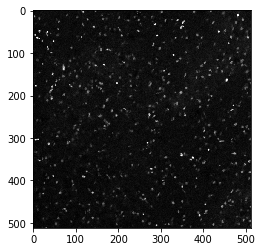

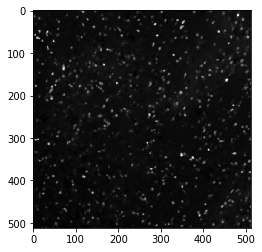

In [22]:
PI_filtered = ndi.gaussian_filter(PI, sigma=1)
PIplot = plt.imshow(1-PI, cmap='Greys')
plt.show()
filteredplot = plt.imshow(1-PI_filtered, cmap='Greys')
plt.show()

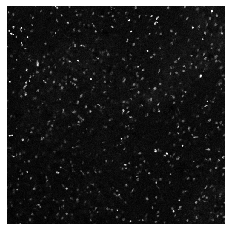

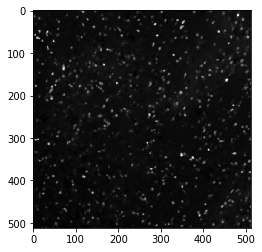

In [27]:
PI_filtered = ndi.gaussian_filter(PI, sigma=1)
PIplot = plt.imshow((1-PI)*10, cmap='Greys')
plt.axis('off')
plt.show()
filteredplot = plt.imshow(1-PI_filtered, cmap='Greys')
plt.show()

skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen


(<Figure size 1440x1296 with 8 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x1c19d72350>,
       dtype=object))

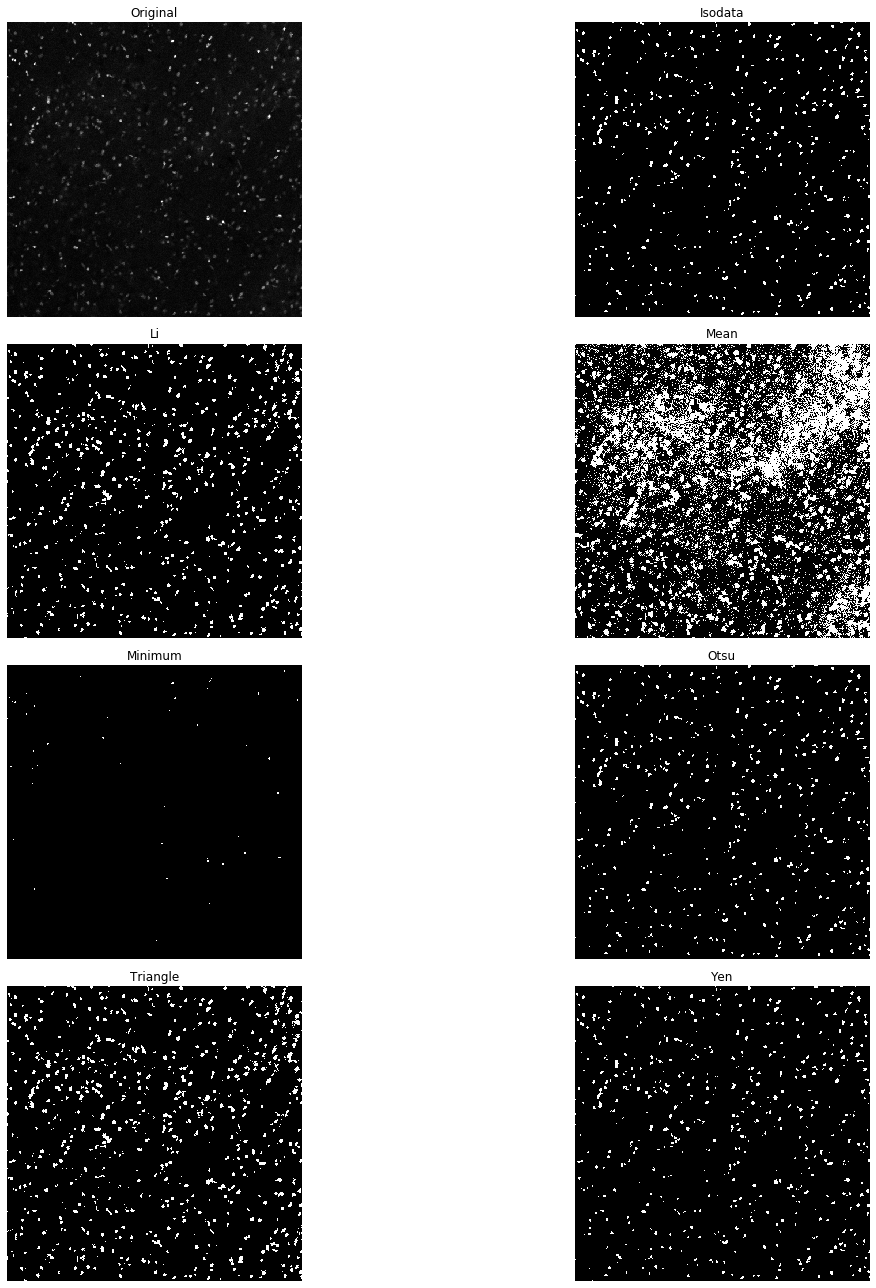

In [23]:
try_all_threshold(PI, figsize=(20,18))

skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen


(<Figure size 1440x1296 with 8 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x1c1bdc7b50>,
       dtype=object))

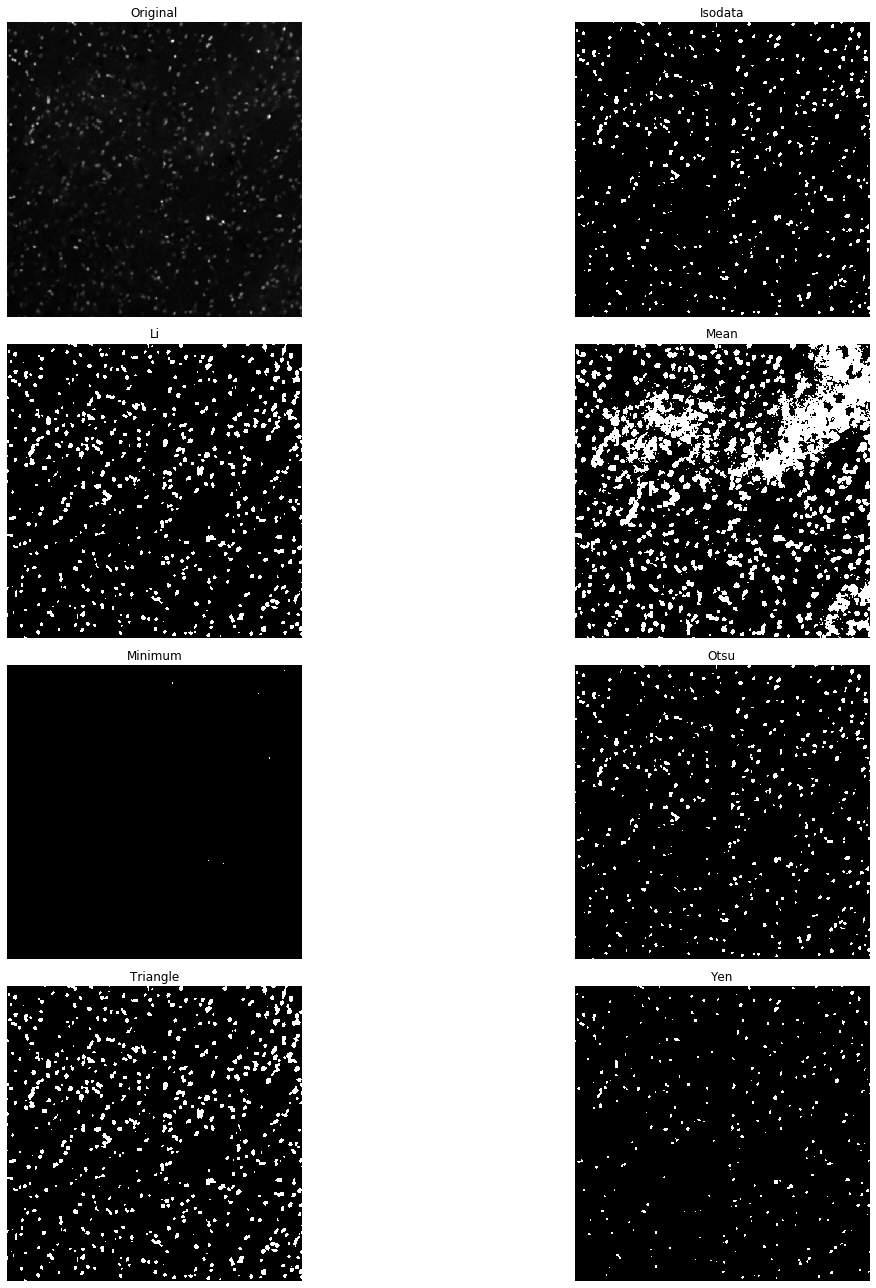

In [24]:
try_all_threshold(PI_filtered, figsize=(20,18))

## using the non-filtered image here

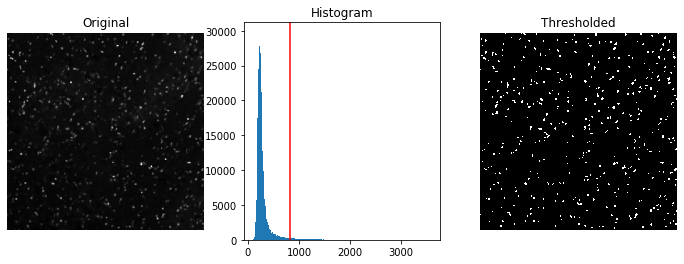

In [46]:
PI_thresh = skimage.filters.threshold_otsu(PI)
PI_binary = PI > PI_thresh

fig, axes = plt.subplots(ncols=3, figsize=(12, 4))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(PI_filtered, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(PI_filtered.ravel(), bins=256)
ax[1].set_title('Histogram')
ax[1].axvline(PI_thresh, color='r')

ax[2].imshow(PI_binary, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

plt.show()

## no need to dilate, no need to fill holes

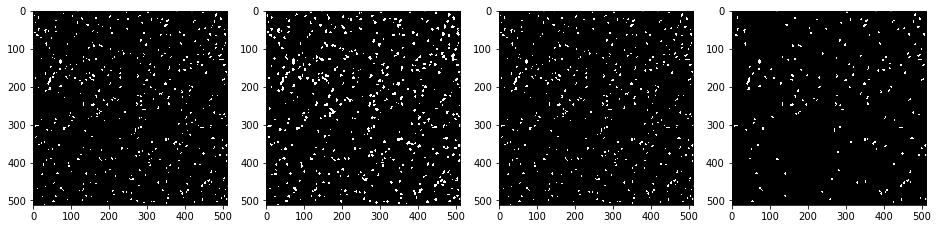

In [55]:
#PI_dilation = skimage.morphology.binary_dilation(PI_binary)
#PI_filled_holes = ndi.binary_fill_holes(PI_binary)
PI_clean = skimage.morphology.remove_small_objects(PI_binary, min_size=20)


fig, axes = plt.subplots(ncols=4, figsize=(16, 4))
ax = axes.ravel()
ax[0] = plt.subplot(1, 4, 1)
ax[1] = plt.subplot(1, 4, 2)
ax[2] = plt.subplot(1, 4, 3)
ax[3] = plt.subplot(1, 4, 4)
ax[0].imshow(PI_binary, cmap=plt.cm.gray)
ax[1].imshow(PI_dilation, cmap=plt.cm.gray)
ax[2].imshow(PI_filled_holes, cmap=plt.cm.gray)
ax[3].imshow(PI_clean, cmap=plt.cm.gray)
plt.show()

In [56]:
labeled_PI, _ = ndi.label(PI_clean)
PI_props = measure.regionprops(labeled_PI)

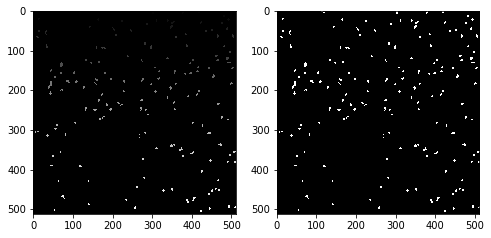

In [57]:
fig, axes = plt.subplots(ncols=2, figsize=(8, 4))
ax = axes.ravel()
ax[0] = plt.subplot(1, 2, 1)
ax[1] = plt.subplot(1, 2, 2)
ax[0].imshow(labeled_PI, cmap=plt.cm.gray)
ax[1].imshow(PI_clean, cmap=plt.cm.gray)

plt.show()

In [72]:
print(len(PI_props))
props_PI = pd.DataFrame(columns=['centroid x', 'centroid y', 'filled_area', 'area'])

k = 1
for props in PI_props:
    #Get the properties that I need for areas
    #Add them into a pandas dataframe that has the same number of rows as objects detected
    #
    centroid = props.centroid
    centroid_x = centroid[0]
    centroid_y = centroid[1]
    fill_area = props.filled_area
    area = props.area
    props_PI.loc[k] = [centroid_x, centroid_y, fill_area, area]
    k = k + 1

159


## Final Calcs

In [73]:
PI_overlap_sum = 0
DAPI_pixels = 0
i = 0
PI_pixels = 0

for ydim in range(0,512):
    for xdim in range(0,512):
        if labeled_DAPI[ydim][xdim] != 0:
            PI_overlap_sum = PI_overlap_sum + PI[ydim][xdim]
            DAPI_pixels = DAPI_pixels+1
            i = i + 1
            if labeled_PI[ydim][xdim] != 0:
                PI_pixels = PI_pixels + 1

In [75]:
dead_count = 0
live_count= 0


for nuc in range(1, len(props_DAPI)+1):
    live = 0
    dead = 0
    for ydim in range(0,512):
        for xdim in range(0,512):
            if labeled_DAPI[ydim][xdim] == nuc:
                if labeled_PI[ydim][xdim] == 0:
                    live = live+1
                else:
                    dead = dead+1
    if dead/(live+dead) > 0.5:
        dead_count = dead_count+1
    else:
        live_count = live_count+1

In [76]:
print(i)
print(PI_overlap_sum)
print(PI_pixels)
print(DAPI_pixels)
print(PI_pixels/DAPI_pixels)
print(dead_count/(dead_count+live_count))

7339
9054299
4163
7339
0.567243493663987
0.6282051282051282


In [43]:
output_data = pd.DataFrame(columns=['DAPI count','DAPI intensity', 'DAPI area', 'PI count', 'PI intensity', 'PI area', 'PI w/in DAPI area', '%overlap PI/DAPI', '% cell death'])

In [44]:
output_data = output_data.append({'DAPI count':len(props_DAPI), 'PI count':len(props_PI), 'DAPI intensity':DAPI.sum(), 'PI intensity':PI.sum(), 'DAPI area':props_DAPI['area'].sum(), 'PI area':props_PI['area'].sum(), 'PI w/in DAPI area':PI_overlap_sum, '%overlap PI/DAPI':PI_pixels/DAPI_pixels, '% cell death':dead_count/(dead_count+live_count)}, ignore_index=True)

In [45]:
output_data

,DAPI count,DAPI intensity,DAPI area,PI count,PI intensity,PI area,PI w/in DAPI area,%overlap PI/DAPI,% cell death
0,330.0,9056161.0,16086.0,262.0,77405892.0,10839.0,14445253.0,0.655042,0.718182


0.19322647664461157